AI-Driven Daily Store Replenishment & Promotion Decision System

This is not a customer-facing chatbot.

In [47]:
import sys
from pathlib import Path

project_root = Path().absolute().parent.parent
sys.path.insert(0, str(project_root))
from tutorial.llm_factory import LLMFactory

In [48]:
from typing import TypedDict, List

class RetailState(TypedDict):
    customer_message: str
    recommendations: List[str]
    discounts: List[str]
    trending: List[str]
    final_reply: str


In [49]:
llm = LLMFactory().get_llm()

In [50]:
def recommend_products(state: RetailState):
    prompt = f"Customer asked: {state['customer_message']}\nSuggest 3 products."
    result = llm.invoke(prompt).content
    return {"recommendations": result.split(", ")}

In [51]:
def find_discounts(state: RetailState):
    prompt = f"Customer asked: {state['customer_message']}\nSuggest available discounts."
    result = llm.invoke(prompt).content
    return {"discounts": result.split(", ")}

In [52]:
def trending_items(state: RetailState):
    prompt = f"Customer asked: {state['customer_message']}\nList 2 trending items in the store."
    result = llm.invoke(prompt).content
    return {"trending": result.split(", ")}

In [53]:
def generate_reply(state: RetailState):
    reply = (
        f"Hi! Based on your request:\n"
        f"Recommended products: {state['recommendations']}\n"
        f"Available discounts: {state['discounts']}\n"
        f"Trending items: {state['trending']}"
    )
    return {"final_reply": reply}


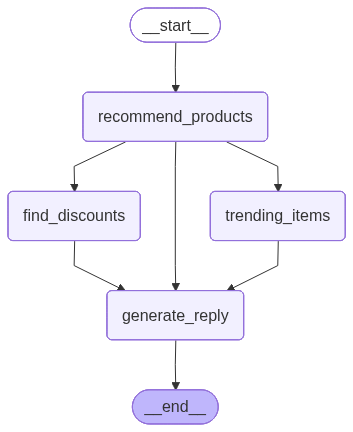

In [54]:
from langgraph.graph import StateGraph, END

graph = StateGraph(RetailState)

graph.add_node("recommend_products", recommend_products)
graph.add_node("find_discounts", find_discounts)
graph.add_node("trending_items", trending_items)
graph.add_node("generate_reply", generate_reply)

graph.set_entry_point("recommend_products")

graph.add_edge("recommend_products", "find_discounts")
graph.add_edge("recommend_products", "trending_items")

graph.add_edge("recommend_products", "generate_reply")
graph.add_edge("find_discounts", "generate_reply")
graph.add_edge("trending_items", "generate_reply")

graph.add_edge("generate_reply", END)

app = graph.compile()
app


In [55]:
input_state = {
    "customer_message": "I want running shoes and a jacket.",
    "recommendations": [],
    "discounts": [],
    "trending": [],
    "final_reply": ""
}

result = app.invoke(input_state)

print(result["final_reply"])


Hi! Based on your request:
Recommended products: ["Here are three product suggestions for running shoes and a jacket:\n\n### Running Shoes:\n1. **Nike Air Zoom Pegasus 40**  \n   - Lightweight and responsive cushioning for daily runs.  \n   - Breathable mesh upper for comfort.  \n   - Durable outsole for traction on various surfaces.\n\n2. **Adidas Ultraboost 22**  \n   - Boost midsole for energy return and comfort.  \n   - Primeknit upper for a snug fit.  \n   - Stylish design suitable for running and casual wear.\n\n3. **ASICS Gel-Nimbus 25**  \n   - Gel cushioning for shock absorption.  \n   - Soft and supportive fit for long-distance runs.  \n   - Durable outsole for stability.\n\n### Running Jackets:\n1. **Nike Windrunner Jacket**  \n   - Lightweight and water-resistant.  \n   - Ventilation for breathability during runs.  \n   - Iconic chevron design for style.\n\n2. **Adidas Own the Run Jacket**  \n   - Windproof and water-repellent material.  \n   - Reflective details for visibi

Hi! Based on your request:
Recommended products: ["Here are three product suggestions for running shoes and a jacket:\n\n### Running Shoes:\n1. **Nike Air Zoom Pegasus 40**  \n   - Lightweight and responsive cushioning for daily runs.  \n   - Breathable mesh upper for comfort.  \n   - Durable outsole for traction on various surfaces.\n\n2. **Adidas Ultraboost 22**  \n   - Boost midsole for energy return and comfort.  \n   - Primeknit upper for a snug fit.  \n   - Stylish design suitable for running and casual wear.\n\n3. **ASICS Gel-Nimbus 25**  \n   - Gel cushioning for shock absorption.  \n   - Soft and supportive fit for long-distance runs.  \n   - Durable outsole for stability.\n\n### Running Jackets:\n1. **Nike Windrunner Jacket**  \n   - Lightweight and water-resistant.  \n   - Ventilation for breathability during runs.  \n   - Iconic chevron design for style.\n\n2. **Adidas Own the Run Jacket**  \n   - Windproof and water-repellent material.  \n   - Reflective details for visibility in low light.  \n   - Adjustable hood for added protection.\n\n3. **Under Armour Storm Run Jacket**  \n   - Water-resistant finish to keep you dry.  \n   - Stretchy fabric for unrestricted movement.  \n   - Zippered pockets for secure storage.\n\nLet me know if you'd like more details or alternatives!"]
Available discounts: ['Certainly! Here are some suggestions for discounts that might be available for running shoes and jackets:\n\n1. **Seasonal Sales**: Check for seasonal promotions like end-of-season sales', 'Black Friday', 'or holiday discounts. These often include deals on apparel and footwear.\n\n2. **Bundle Discounts**: Some stores offer discounts when you purchase multiple items together', "such as a running jacket and shoes.\n\n3. **Loyalty Programs**: If you're a member of a store's loyalty program", 'you may be eligible for exclusive discounts or reward points that can be applied to your purchase.\n\n4. **Clearance Sales**: Look for clearance sections where running shoes and jackets might be heavily discounted.\n\n5. **Coupon Codes**: Search for online coupon codes for specific brands or retailers. Websites like RetailMeNot or Honey can help you find active codes.\n\n6. **Student or Military Discounts**: Some stores offer discounts for students', 'military personnel', 'or first responders.\n\n7. **Buy One', 'Get One (BOGO)**: Retailers sometimes run BOGO promotions', 'where you can get a second item (like a jacket) at a discount or for free when you buy running shoes.\n\n8. **Email Sign-Up Offers**: Many retailers offer a discount (e.g.', '10-20% off) when you sign up for their email newsletter.\n\n9. **Price Matching**: If you find a better price for the same running shoes or jacket at another store', "some retailers will match the price.\n\n10. **Membership Discounts**: Stores like REI or Dick's Sporting Goods may offer discounts to members or cardholders.\n\nLet me know if you'd like help finding specific deals or retailers!"]
Trending items: ['Here are two trending items in the store:  \n\n1. **Running Shoes**: *Nike Air Zoom Pegasus 40* - Lightweight', 'durable', 'and designed for comfort during long runs.  \n2. **Jacket**: *The North Face Apex Bionic 2 Jacket* - Windproof and water-resistant', "perfect for outdoor activities.  \n\nLet me know if you'd like more details!"]

In [62]:
result["final_reply"]

'Hi! Based on your request:\nRecommended products: ["Here are three product suggestions for running shoes and a jacket:\\n\\n### Running Shoes:\\n1. **Nike Air Zoom Pegasus 40**  \\n   - Lightweight and responsive cushioning for daily runs.  \\n   - Breathable mesh upper for comfort.  \\n   - Durable outsole for traction on various surfaces.\\n\\n2. **Adidas Ultraboost 22**  \\n   - Boost midsole for energy return and comfort.  \\n   - Primeknit upper for a snug fit.  \\n   - Stylish design suitable for running and casual wear.\\n\\n3. **ASICS Gel-Nimbus 25**  \\n   - Gel cushioning for shock absorption.  \\n   - Soft and supportive fit for long-distance runs.  \\n   - Durable outsole for stability.\\n\\n### Running Jackets:\\n1. **Nike Windrunner Jacket**  \\n   - Lightweight and water-resistant.  \\n   - Ventilation for breathability during runs.  \\n   - Iconic chevron design for style.\\n\\n2. **Adidas Own the Run Jacket**  \\n   - Windproof and water-repellent material.  \\n   - R